In [1]:
!pip install python-resize-image


In [2]:
import pandas as pd
import numpy as np
import random
from PIL import Image, ImageDraw, ImageFont
from resizeimage import resizeimage
import cv2
from google.colab.patches import cv2_imshow

In [3]:
import nltk
from nltk import tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
### functions

def get_concat_h(im1, im2):

  """ Function for concateinationg images """

  dst = Image.new('RGB', (im1.width + im2.width, im1.height))
  dst.paste(im1, (0, 0))
  dst.paste(im2, (im1.width, 0))
  return dst





def split_des_lines(description, split_num: int):

  """ Splitting the description into different lines to fit into the image """

  list_message_2 = []
  spliitted_message_2 = description.split(' ')

  j = 0
  me = ""

  for i,j in enumerate(spliitted_message_2):

    me = me + " " + j

    if (i>0) & ( (i % split_num) == 0):

      list_message_2.append(me)
      me = ""

    if i == len(spliitted_message_2) -1:
      list_message_2.append(me)


  list_message_2 = [i.strip() for i in list_message_2]

  return list_message_2



def optimize(input):

  sbs = tokenize.sent_tokenize(input)
  sbs = sbs[:len(sbs)-1]
  sbs

  sbs_ = ""

  for i in range(len(sbs)):
    sbs_ = sbs_ + " " + sbs[i]


  return sbs_.strip()




def create_airbnb_thumbnail(sub_df: pd.DataFrame, peft):

  """ Function to creqte thumbnail similar to tose on the iarbnb webpage.
  It shal consist of th main listing image as well as two titles and the description """

  ## splitting the description
  des = optimize(sub_df.description)
  list_message_2 = split_des_lines(des)


  ###### drawing the image ####

  width = 912
  height = 512

  message_1 = "Description:"

  message_text_name = "Title 1:"
  message_text_name_2 = sub_df["name"]

  message_another_text_name = "Title 2:"

  if peft == False:
    message_another_text_name_2 = sub_df.gen_titles_llama_no_peft
  else:
    message_another_text_name_2 = sub_df.gen_titles_llama_adapter


  img_text = Image.new('RGB', (width, height), color='white')

  imgDraw = ImageDraw.Draw(img_text)


  ## drwagin titles

  imgDraw.text((30, 15), message_text_name, fill=(0, 0, 0),  font=font_type_1)
  imgDraw.text((30, 40), message_text_name_2, fill=(0, 0, 0),  font=font_type_1)

  imgDraw.text((30, 90), message_another_text_name, fill=(0, 0, 0),  font=font_type_1)
  imgDraw.text((30, 115), message_another_text_name_2, fill=(0, 0, 0),  font=font_type_1)


  ### drwaing descriptions

  imgDraw.text((30, 190), message_1, fill=(0, 0, 0),  font=font_type_1)

  position = 200

  for i in range(len(list_message_2)):

    position = position + 20
    imgDraw.text((30, position), list_message_2[i], fill=(0, 0, 0),  font=font_type_2)


  ###  loading in the listing main images

  img_current = Image.open(f"/content/gdrive/My Drive/Thesis/Image_data/img_{sub_df.id}.jpg")

  # rezizing that image so that the height fits to the text image
  img = resizeimage.resize_height(img_current, 512)


  ### concatenation
  concat_image = get_concat_h(img, img_text)

  return concat_image


def get_concat_v(im1, im2):

  """ Function for concateinationg images vertically """

  dst = Image.new('RGB', (im1.width, im1.height + im2.height))
  dst.paste(im1, (0, 0))
  dst.paste(im2, (0, im1.height))
  return dst



def create_airbnb_thumbnail_new(sub_df: pd.DataFrame, peft, split_num: int):

  """ New function to create image with description below!
   Function to creqte thumbnail similar to tose on the iarbnb webpage.
  It shal consist of th main listing image as well as two titles and the description """

  ## splitting the description
  des = optimize(sub_df.description)
  list_message_2 = split_des_lines(des, split_num)


  ###### drawing the image 1 with titles ####

  width = 912
  height = 512

  message_1 = "Description:"

  message_text_name = "Title 1:"
  message_text_name_2 = sub_df["name"]

  message_another_text_name = "Title 2:"

  if peft == False:
    message_another_text_name_2 = sub_df.gen_titles_llama_no_peft
  else:
    message_another_text_name_2 = sub_df.gen_titles_llama_adapter


  img_text = Image.new('RGB', (width, height), color='white')

  imgDraw = ImageDraw.Draw(img_text)


  ## drwagin titles

  imgDraw.text((30, 15), message_text_name, fill=(0, 0, 0),  font=font_type_1)
  imgDraw.text((30, 45), message_text_name_2, fill=(0, 0, 0),  font=font_type_1)

  imgDraw.text((30, 120), message_another_text_name, fill=(0, 0, 0),  font=font_type_1)
  imgDraw.text((30, 150), message_another_text_name_2, fill=(0, 0, 0),  font=font_type_1)


  ###  loading in the listing main images

  img_current = Image.open(f"/content/gdrive/My Drive/Thesis/Image_data/img_{sub_df.id}.jpg")

  # rezizing that image so that the height fits to the text image
  img = resizeimage.resize_height(img_current, 512)


  ### concatenation
  concat_image_1 = get_concat_h(img, img_text)


  ###### drawing the image 2 with description ####

  width_image_2 = concat_image_1.size[0]
  height_image_2 =   380


  img_text_des = Image.new('RGB', (width_image_2, height_image_2), color='white')

  imgDraw_des = ImageDraw.Draw(img_text_des)


  ### drwaing descriptions

  imgDraw_des.text((30, 25), message_1, fill=(0, 0, 0),  font=font_type_1)

  position = 35

  for i in range(len(list_message_2)):

    position = position + 28
    imgDraw_des.text((30, position), list_message_2[i], fill=(0, 0, 0),  font=font_type_2)


  ### final concatenation


  concat_image = get_concat_v(concat_image_1, img_text_des)


  return concat_image


def create_airbnb_thumbnail_three_titles(sub_df: pd.DataFrame, split_num: int):

  """ New function to create image with three descriptions!
   Function to creqte thumbnail similar to tose on the iarbnb webpage.
  It shal consist of th main listing image as well as two titles and the description """

  des = optimize(sub_df.description)
  list_message_2 = split_des_lines(des, split_num)


  width = 912
  height = 512

  message_1 = "Description:"

  message_text_name = "Title 1:"
  message_text_name_2 = sub_df["name"]

  message_another_text_name_1a = "Title 2:"
  message_another_text_name_1b = sub_df.gen_titles_llama_adapter

  message_another_text_name_2a = "Title 3:"
  message_another_text_name_2b = sub_df.gen_titles_llama_no_peft


  img_text = Image.new('RGB', (width, height), color='white')

  imgDraw = ImageDraw.Draw(img_text)


  ## drwagin titles

  imgDraw.text((30, 15), message_text_name, fill=(0, 0, 0),  font=font_type_1)
  imgDraw.text((30, 45), message_text_name_2, fill=(0, 0, 0),  font=font_type_1)

  imgDraw.text((30, 120), message_another_text_name_1a, fill=(0, 0, 0),  font=font_type_1)
  imgDraw.text((30, 150), message_another_text_name_1b, fill=(0, 0, 0),  font=font_type_1)

  imgDraw.text((30, 225), message_another_text_name_2a, fill=(0, 0, 0),  font=font_type_1)
  imgDraw.text((30, 255), message_another_text_name_2b, fill=(0, 0, 0),  font=font_type_1)


  ###  loading in the listing main images

  img_current = Image.open(f"/content/gdrive/My Drive/Thesis/Image_data/img_{sub_df.id}.jpg")

  # rezizing that image so that the height fits to the text image
  img = resizeimage.resize_height(img_current, 512)


  ### concatenation
  concat_image_1 = get_concat_h(img, img_text)


  ###### drawing the image 2 with description ####

  width_image_2 = concat_image_1.size[0]
  height_image_2 =   380


  img_text_des = Image.new('RGB', (width_image_2, height_image_2), color='white')

  imgDraw_des = ImageDraw.Draw(img_text_des)


  ### drwaing descriptions

  imgDraw_des.text((30, 25), message_1, fill=(0, 0, 0),  font=font_type_1)

  position = 35

  for i in range(len(list_message_2)):

    position = position + 28
    imgDraw_des.text((30, position), list_message_2[i], fill=(0, 0, 0),  font=font_type_2)


  ### final concatenation


  concat_image = get_concat_v(concat_image_1, img_text_des)


  return concat_image

In [5]:
# connecting to drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [6]:
### loading in fonts to be used in setting up the thumbnails later

#font_type_1 = ImageFont.truetype("/content/gdrive/My Drive/Thesis/arial.ttf", 21)
#font_type_2 = ImageFont.truetype("/content/gdrive/My Drive/Thesis/arial.ttf", 18)

font_type_1 = ImageFont.truetype("/content/gdrive/My Drive/Thesis/arial.ttf", 23)
font_type_2 = ImageFont.truetype("/content/gdrive/My Drive/Thesis/arial.ttf", 21)

## Comparing titles for one listing

In [ ]:
## 5 - 10

In [7]:
## for the descriptions
airbnb_london_filtered_images = pd.read_csv("/content/gdrive/My Drive/Thesis/London_Data/discriminator_tabular_data_images.csv")

In [8]:
merged_counterfactuals_titles = pd.read_csv("/content/gdrive/My Drive/Thesis/Discriminator_Predictions/merged_counterfactuals_titles.csv")

merged_counterfactuals_titles.columns

Index(['id', 'pred_distilbart', 'proxy', 'pred_pegasus', 'pred_bart',
       'pred_llama_lora', 'pred_llama_adapter', 'pred_llama_no_peft', 'name',
       'gen_titles_distilbart', 'gen_titles_bart', 'gen_titles_pegasus',
       'gen_titles_llama_lora', 'gen_titles_llama_adapter',
       'gen_titles_llama_no_peft'],
      dtype='object')

In [ ]:
merged_counterfactuals_titles

,id,name,gen_titles_llama_lora,gen_titles_llama_adapter,gen_titles_llama_no_peft
0,396235,"Trendy London Double Room, Cafes & XLent Trans...","Cosy, light and spacious London pad",Cosy & Chilled out room in Fitzrovia/Central L...,London Pad for Female Guest
1,503331,"Bright, beautiful & spacious house in Hackney",Katrin’s London garden home!,Katrin’s London home: a lovely family home,'Victorian Terraced House in London'
2,476808,Prime Kensington luxury 2 bed flat with terrace,"Stunning 2 bed, 2 bathroom apartment near Hyde...","Stunning 2 bed, 2 bath apartment near Hyde Park",Kensington Flat
3,600357,Spacious Modern 1 Bed Flat Hackney,Self-contained Flat in Hackney -3rd Floor,Self-contained Flat in a Modern Building,Hackney Flat for 2 or 4 People
4,615169,Loftroom in moden home near Silver Street Station,Lovely 1 bed room in Dalston,"Lovely studio, 15 mins from central London",Spacious Loft Room with Natural Light and Space
...,...,...,...,...,...
743,53123156,"Perfectly located 3 bedroom apartment, Camden ...",Central London | 3-bedroom apartment in Camden,Central London 3 Bedroom apartment with free p...,Camden Town 3 Bedroom Apartment
744,53034826,Superior Studio Room by Tower Suites Hotel,Tower Suite - 2 Bedroom Suite - 4 Double Beds,Tower Suite - Family Suite - 4 Beds - 2 Baths,Tower Suites Hotel by Blue Orchid
745,53106269,Lea Bridge: Double in Quiet Peaceful Sunny Flat,"HOLISTIC HAVEN - Peaceful, quiet room in Walth...","HOLISTIC HAVEN: Quiet, spacious, garden room i...",Victorian Maisonette - Holistic Haven
746,53581807,Lovely one bedroom flat with spacious living room,1 bedroom flat in Putney. King size bed.,Spacious 1 bedroom flat in Putney,East Putney Spacious Flat


In [9]:
# just a quality check:

merged_counterfactuals_titles = merged_counterfactuals_titles[merged_counterfactuals_titles.proxy != 3]
merged_counterfactuals_titles.index = range(merged_counterfactuals_titles.shape[0])

In [10]:


merged_counterfactuals_titles = merged_counterfactuals_titles[["id", "name", 'gen_titles_llama_lora', 'gen_titles_llama_adapter','gen_titles_llama_no_peft']]


## from here on - drop

In [ ]:
gg = [25, 295, 764, 367, 369, 507, 220, 773, 424, 741, 514, 130, 160, 141, 81, 301, 54, 812, 508, 415]

ggg = [652, 124, 863, 517, 264, 410, 36, 968, 72, 812, 122, 470, 98, 220, 285, 409, 718, 348, 138,
      477, 304, 768, 2, 146, 919, 17, 854, 167, 434, 466, 66, 899, 395, 324, 156, 712, 178, 320, 826,
      491, 709, 331, 118, 140, 462, 119, 572, 234, 190, 768, 108, 90, 935, 350, 280, 907, 520, 924, 131, 176, 182, 529]


ac = gg + ggg
abc = np.unique(ac)
len(abc)

79

In [ ]:
### prep survey 1 -



In [ ]:
merged_counterfactuals_titles_1 = merged_counterfactuals_titles[merged_counterfactuals_titles.index.isin(abc)]

merged_counterfactuals_titles_2 = merged_counterfactuals_titles.drop(merged_counterfactuals_titles_1.index, axis = 0)


In [ ]:
merged_counterfactuals_titles_2["abc"] = "la"
merged_counterfactuals_titles_2["xyz"] = "la"



In [ ]:

for idx in merged_counterfactuals_titles_2.index:

  rand = random.uniform(0,1)

  if rand > 0.5:

    merged_counterfactuals_titles_2["abc"][idx] =   merged_counterfactuals_titles_2["name"][idx]
    merged_counterfactuals_titles_2["xyz"][idx] =   merged_counterfactuals_titles_2["gen_titles_llama_no_peft"][idx]

  else:

    merged_counterfactuals_titles_2["xyz"][idx] =   merged_counterfactuals_titles_2["name"][idx]
    merged_counterfactuals_titles_2["abc"][idx] =   merged_counterfactuals_titles_2["gen_titles_llama_no_peft"][idx]





In [ ]:
merged_counterfactuals_titles_2 = merged_counterfactuals_titles_2.drop(["name", "gen_titles_llama_no_peft"], axis = 1)

merged_counterfactuals_titles_2 = merged_counterfactuals_titles_2.rename(columns={"abc": "name", "xyz": "gen_titles_llama_no_peft"})


In [ ]:
merged_counterfactuals_titles = merged_counterfactuals_titles_1.append(merged_counterfactuals_titles_2)



<ipython-input-244-3d19390cd987>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_counterfactuals_titles = merged_counterfactuals_titles_1.append(merged_counterfactuals_titles_2)


In [ ]:

for idx in range(10):

  i = random.randrange(merged_counterfactuals_titles.shape[0])

  print(str(i))
  print(f"True Name: {str(merged_counterfactuals_titles.name[i])}")
  print(f"LLama (Adapter)-generated Name: {str(merged_counterfactuals_titles.gen_titles_llama_adapter[i])}")
  print("               ")
  print(f"True Name: {str(merged_counterfactuals_titles.name[i])}")
  print(f"LLama (no_peft)-generated Name: {str(merged_counterfactuals_titles.gen_titles_llama_no_peft[i])}")
  print(f'-----------------------------------------------')


In [ ]:

merged_counterfactuals_titles_data = pd.merge(merged_counterfactuals_titles, airbnb_london_filtered_images[["id", "description"]], on = "id", how = "left")


In [ ]:
merged_counterfactuals_titles_data.columns

Index(['id', 'name', 'gen_titles_llama_lora', 'gen_titles_llama_adapter',
       'gen_titles_llama_no_peft', 'description'],
      dtype='object')

In [ ]:
survey_data_1 = pd.read_csv("/content/gdrive/My Drive/Thesis/survey_data/survey_data_1.csv")


## Saving thumbnail images for the surveys



In [11]:
merged_counterfactuals_titles_data = pd.merge(merged_counterfactuals_titles, airbnb_london_filtered_images[["id", "description"]], on = "id", how = "left")

### For Part 1

In [ ]:
survey_data_1 = merged_counterfactuals_titles_data[["id", "description", "name", "gen_titles_llama_no_peft"]]
survey_data_1 = survey_data_1.sample(n = 200)
survey_data_1.index  = list(range(survey_data_1.shape[0]))

#survey_data_1.to_csv("/content/gdrive/My Drive/Thesis/survey_data/survey_data_1.csv")

In [20]:
### dropp !!!!

la = [4, 5, 21, 33, 37, 46, 68, 83, 89, 121, 125, 135, 140, 149, 150, 163, 167, 169, 190]

survey_data_1 = survey_data_1.drop(la,axis=0)



In [21]:

### loop to save all images


for i in range(survey_data_1.shape[0]):

  print(i)

  try:
    sub_df = survey_data_1.iloc[i,:]

    img_joint = create_airbnb_thumbnail_new(sub_df, False, 18)

    save_name = f"/content/gdrive/My Drive/Thesis/survey_data/survey_1/survey_1_img_{str(sub_df.id)}.png"
#    save_name = f"/content/gdrive/My Drive/Thesis/survey_data/Survey_1_images/survey_1_img_{str(sub_df.id)}.png"

    img_joint.save(save_name)

  except:

    pass


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180



Finally also saving a txt file to store properties on the generated thumbnuals for Unipark

(see Unipark -> Project -< Qeustionnaire Editor -> Loop -> List -> List Elements)


1;1;survey_1_img_51762944.png;;;;;4

In [22]:
import os

all_in  = os.listdir("/content/gdrive/My Drive/Thesis/survey_data/survey_1")

In [24]:
## also saving txt file for unipark !!
survey_data_1.index  = list(range(survey_data_1.shape[0]))

c1, c2, c3, c4, c5, c6, c7, c8 = [], [], [], [], [], [], [], []

for i in range(survey_data_1.shape[0]):

  index = i + 1
  save_name  =  f"survey_1_img_{str(survey_data_1.id[i])}.png"

  if save_name in all_in:

    c1.append(index)
    c2.append(index)
    c3.append(save_name)
    c4.append('')
    c5.append('')
    c6.append('')
    c7.append('')
    c8.append(4)



In [25]:
metadata_1 = pd.DataFrame({"c1":c1, "c2":c2, "c3":c3, "c4":c4, "c5":c5, "c6":c6, "c7":c7, "c8":c8})

In [26]:
metadata_1.to_csv('/content/gdrive/My Drive/Thesis/survey_data/metadata_1.txt', sep=';', index = False)

### For Part 2

# OLD

In [ ]:
###drop !!!


merged_counterfactuals_titles_data.columns

Index(['id', 'name', 'gen_titles_llama_lora', 'gen_titles_llama_adapter',
       'gen_titles_llama_no_peft', 'description'],
      dtype='object')

In [ ]:
a_worse = pd.read_csv("/content/gdrive/My Drive/Thesis/loss_data/gen_titles_llama_no_peft.csv")
a_worse

,id,gen_title
0,19443194,Fulham Broadway Flat
1,14071318,Central London in 20 minutes
2,23847732,Brick Lane Flat
3,38260808,Flat in Edwardian Cul-de-sac
4,9531664,Leyton Tube Station: 17minutes to Central London
...,...,...
995,6704485,Clapham High Street Flat
996,53035936,Versatile Studio Nestled in Private Estate.
997,3305771,Trendy East London Studio Flat
998,34339339,Stratford West Ham Super Bright Flat


In [ ]:
merged_counterfactuals_titles_data_ = pd.merge(merged_counterfactuals_titles_data, a_worse, on  = "id", how = "inner")

In [ ]:
merged_counterfactuals_titles_data_.columns

Index(['id', 'name', 'gen_titles_llama_lora', 'gen_titles_llama_adapter',
       'gen_titles_llama_no_peft', 'description', 'gen_title'],
      dtype='object')

In [ ]:
merged_counterfactuals_titles_data_ = merged_counterfactuals_titles_data_[['id', 'name', 'gen_titles_llama_adapter',  'description', 'gen_title' ]]

In [ ]:


for i in range(merged_counterfactuals_titles_data_.shape[0]):

  rand = random.uniform(0,1)

  if rand > 0.5:
    merged_counterfactuals_titles_data_.name[i] =  merged_counterfactuals_titles_data_.gen_title[i]



<ipython-input-67-0487fc81a3b3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_counterfactuals_titles_data_.name[i] =  merged_counterfactuals_titles_data_.gen_title[i]


In [ ]:
gg = [25, 295, 764, 367, 369, 507, 220, 773, 424, 741, 514, 130, 160, 141, 81, 301, 54, 812, 508, 415]

ggg = [652, 124, 863, 517, 264, 410, 36, 968, 72, 812, 122, 470, 98, 220, 285, 409, 718, 348, 138,
      477, 304, 768, 2, 146, 919, 17, 854, 167, 434, 466, 66, 899, 395, 324, 156, 712, 178, 320, 826,
      491, 709, 331, 118, 140, 462, 119, 572, 234, 190, 768, 108, 90, 935, 350, 280, 907, 520, 924, 131, 176, 182, 529]


ac = gg + ggg
abc = np.unique(ac)
len(abc)

79

In [ ]:
merged_counterfactuals_titles_1 = merged_counterfactuals_titles_data_[merged_counterfactuals_titles_data_.index.isin(abc)]

merged_counterfactuals_titles_2 = merged_counterfactuals_titles_data_.drop(merged_counterfactuals_titles_1.index, axis = 0)


In [ ]:
# sampling rest, i.e. 121

abc = merged_counterfactuals_titles_2.sample(n = 121)

merged_counterfactuals_titles_data_ = merged_counterfactuals_titles_1.append(abc)

<ipython-input-69-acd59902cb82>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_counterfactuals_titles_data_ = merged_counterfactuals_titles_1.append(abc)


In [ ]:
merged_counterfactuals_titles_data_

,id,name,gen_titles_llama_adapter,description,gen_title
666,40114686,Entire 1 bedroom flat w. large reception & kit...,Central London with direct tube access,"Entire 1 bedroom flat with 1 double bedroom, l...",Spacious 50m2 538 Sq Ft Flat in
582,33668694,Affordable Chelsea Flat,Chelsea cozy room in the heart of Chelsea,"Beautiful, cozy room in the heart of Chelsea, ...",Affordable Chelsea Flat
325,19876637,Flat to Rent in Earlsfield,"Family home in Earlsfield, London SW15",Looking to rent a double room in a 3 bed fun y...,Flat to Rent in Earlsfield
709,46395477,Super Chic 3BD Flat Imperial Wharf -Central Lo...,Elegant & Super Chic 3 Bedroom Flat in Central...,Super chic super elegant & spacious 3 bedroom ...,Luxury Flat
530,29735221,Modern Flat Near Waterside.,Modern 1 bedroom apartment - 4 people max. Wat...,Beautiful modern 1 bedroom house near watersid...,Modern Flat Near Waterside.
...,...,...,...,...,...
368,21442174,Upper Maisonette in Barnsbury Conservation Area,Spacious 1-Bed in Kings Cross/Angel/Barnsbury,Beautiful split level upper maisonette with a ...,Upper Maisonette in Barnsbury Conservation Area
341,20137265,Double Room Available,"Double room in tower building, easy commute to...","Hi, A lovely double room available, mini fridg...",Double Room Available
110,9734446,St Johns Wood Apartment.,Bright Double Bedroom with Patio in St Johns Wood,Vibrantly spacious double bedroom apartment wi...,St Johns Wood Apartment.
133,11506545,2 Bed Flat,Large double room in a 2 bed flat,Private room with your own bathroom in our 2 b...,2 Bed Flat


In [ ]:
survey_data_2 = merged_counterfactuals_titles_data_[["id", "name", "gen_titles_llama_adapter", "description"]]

In [ ]:
survey_data_2.to_csv("/content/gdrive/My Drive/Thesis/survey_data/survey_data_2.csv", index = False)


In [ ]:
survey_data_2    ###= survey_data_2[["id", "name", "gen_titles_llama_adapter", "description"]]

,id,name,gen_titles_llama_adapter,description
0,40114686,Entire 1 bedroom flat w. large reception & kit...,Central London with direct tube access,"Entire 1 bedroom flat with 1 double bedroom, l..."
1,33668694,Affordable Chelsea Flat,Chelsea cozy room in the heart of Chelsea,"Beautiful, cozy room in the heart of Chelsea, ..."
2,19876637,Flat to Rent in Earlsfield,"Family home in Earlsfield, London SW15",Looking to rent a double room in a 3 bed fun y...
3,46395477,Super Chic 3BD Flat Imperial Wharf -Central Lo...,Elegant & Super Chic 3 Bedroom Flat in Central...,Super chic super elegant & spacious 3 bedroom ...
4,29735221,Modern Flat Near Waterside.,Modern 1 bedroom apartment - 4 people max. Wat...,Beautiful modern 1 bedroom house near watersid...
...,...,...,...,...
116,21442174,Upper Maisonette in Barnsbury Conservation Area,Spacious 1-Bed in Kings Cross/Angel/Barnsbury,Beautiful split level upper maisonette with a ...
117,20137265,Double Room Available,"Double room in tower building, easy commute to...","Hi, A lovely double room available, mini fridg..."
118,9734446,St Johns Wood Apartment.,Bright Double Bedroom with Patio in St Johns Wood,Vibrantly spacious double bedroom apartment wi...
119,11506545,2 Bed Flat,Large double room in a 2 bed flat,Private room with your own bathroom in our 2 b...


In [ ]:

### loop to save all images


for i in range(survey_data_2.shape[0]):

  print(i)

  try:
    sub_df = survey_data_2.iloc[i,:]

    img_joint = create_airbnb_thumbnail_new(sub_df, True, 18)
    save_name = f"/content/gdrive/My Drive/Thesis/survey_data/survey_2/survey_2_img_{str(sub_df.id)}.png"

    img_joint.save(save_name)

  except:

    pass


In [ ]:
survey_data_2 = pd.read_csv("/content/gdrive/My Drive/Thesis/survey_data/survey_data_2.csv")

survey_data_2.columns

Index(['id', 'name', 'gen_titles_llama_adapter', 'description'], dtype='object')

 end of old

 # BETTER

In [31]:
survey_data_2 = merged_counterfactuals_titles_data[["id", "description", "name", "gen_titles_llama_no_peft"]]
survey_data_2 = survey_data_2.sample(n = 200)
survey_data_2.index  = list(range(survey_data_2.shape[0]))

#survey_data_2.to_csv("/content/gdrive/My Drive/Thesis/survey_data/survey_data_2.csv")



In [32]:
### dropp !!!!

survey_data_2 = pd.read_csv("/content/gdrive/My Drive/Thesis/survey_data/survey_data_2.csv")

la = [41, 48, 77, 89, 97, 119]

survey_data_2 = survey_data_2.drop(la,axis=0)


In [ ]:

### loop to save all images


for i in range(survey_data_2.shape[0]):

  print(i)

  sub_df = survey_data_2.iloc[i,:]

    img_joint = create_airbnb_thumbnail_new(sub_df, True, 18)
    save_name = f"/content/gdrive/My Drive/Thesis/survey_data/survey_2/survey_2_img_{str(sub_df.id)}.png"

    img_joint.save(save_name)




Finally also saving a txt file to store properties on the generated thumbnuals for Unipark

(see Unipark -> Project -< Qeustionnaire Editor -> Loop -> List -> List Elements)


1;1;survey_1_img_51762944.png;;;;;4

In [34]:
#import os

all_in  = os.listdir("/content/gdrive/My Drive/Thesis/survey_data/survey_2")

In [35]:
## also saving txt file for unipark !!

survey_data_2.index  = list(range(survey_data_2.shape[0]))


c1, c2, c3, c4, c5, c6, c7, c8 = [], [], [], [], [], [], [], []

for i in range(survey_data_2.shape[0]):

  index = i + 1
  save_name  =  f"survey_2_img_{str(survey_data_2.id[i])}.png"

  if save_name in all_in:

    c1.append(index)
    c2.append(index)
    c3.append(save_name)
    c4.append('')
    c5.append('')
    c6.append('')
    c7.append('')
    c8.append(4)



In [36]:
metadata_2 = pd.DataFrame({"c1":c1, "c2":c2, "c3":c3, "c4":c4, "c5":c5, "c6":c6, "c7":c7, "c8":c8})

In [37]:
metadata_2.to_csv('/content/gdrive/My Drive/Thesis/survey_data/metadata_2.txt', sep=';', index = False)

## Third case - all three titles on one image



# OLD

In [ ]:
###drop !!!


merged_counterfactuals_titles_data.columns

Index(['id', 'name', 'gen_titles_llama_lora', 'gen_titles_llama_adapter',
       'gen_titles_llama_no_peft', 'description'],
      dtype='object')

In [ ]:
#gg = pd.read_csv("/content/gdrive/My Drive/Thesis/loss_data/gen_titles_llama_no_peft_2.csv")
#gg

,id,gen_title
0,19443194,Fulham Broadway Flat
1,14071318,Central London in 20 minutes
2,23847732,Brick Lane Food Market - Spitalfields Market -...
3,38260808,Cozy Edwardian Home
4,9531664,Leyton Tube Station: 17minutes to Central London
...,...,...
995,6704485,Kingsize Bedroom & Ensuite Bathroom in Stylish...
996,53035936,Versatile Studio Nestled in Private Estate.
997,3305771,Trendy East London Studio Flat
998,34339339,Stratford West Ham Super Bright Flat


In [ ]:


for i in range(merged_counterfactuals_titles_data.shape[0]):

  rand = random.uniform(0,1)

  if rand > 0.5:

    name = merged_counterfactuals_titles_data.name[i]
    gen = merged_counterfactuals_titles_data.gen_titles_llama_no_peft[i]

    merged_counterfactuals_titles_data.name[i] = gen
    merged_counterfactuals_titles_data.gen_titles_llama_no_peft[i] = name



<ipython-input-62-a9ab5fa0abae>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_counterfactuals_titles_data.name[i] = gen
<ipython-input-62-a9ab5fa0abae>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_counterfactuals_titles_data.gen_titles_llama_no_peft[i] = name


In [ ]:
gg = [25, 295, 764, 367, 369, 507, 220, 773, 424, 741, 514, 130, 160, 141, 81, 301, 54, 812, 508, 415]

ggg = [652, 124, 863, 517, 264, 410, 36, 968, 72, 812, 122, 470, 98, 220, 285, 409, 718, 348, 138,
      477, 304, 768, 2, 146, 919, 17, 854, 167, 434, 466, 66, 899, 395, 324, 156, 712, 178, 320, 826,
      491, 709, 331, 118, 140, 462, 119, 572, 234, 190, 768, 108, 90, 935, 350, 280, 907, 520, 924, 131, 176, 182, 529]


ac = gg + ggg
abc = np.unique(ac)
len(abc)

79

In [ ]:
merged_counterfactuals_titles_1 = merged_counterfactuals_titles_data[merged_counterfactuals_titles_data.index.isin(abc)]

merged_counterfactuals_titles_2 = merged_counterfactuals_titles_data.drop(merged_counterfactuals_titles_1.index, axis = 0)


In [ ]:
# sampling rest, i.e. 121

abc = merged_counterfactuals_titles_2 ## .sample(n = 621)

merged_counterfactuals_titles_data_ = merged_counterfactuals_titles_1.append(abc)

<ipython-input-111-b9c1670bbf2a>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_counterfactuals_titles_data_ = merged_counterfactuals_titles_1.append(abc)


In [ ]:
survey_data_3 = merged_counterfactuals_titles_data_[["id", "name", "gen_titles_llama_adapter", "gen_titles_llama_no_peft", "description"]]

In [ ]:
#survey_data_3.to_csv("/content/gdrive/My Drive/Thesis/survey_data/survey_data_3_alt.csv", index = False)


In [ ]:

### loop to save all images


for i in range(survey_data_3.shape[0]):

  print(i)

  try:
    sub_df = survey_data_3.iloc[i,:]

    img_joint = create_airbnb_thumbnail_three_titles(sub_df, 18)
    save_name = f"/content/gdrive/My Drive/Thesis/survey_data/survey_3/survey_3_img_{str(sub_df.id)}.png"

    img_joint.save(save_name)

  except:

    pass


In [ ]:
survey_data_3.columns

Index(['id', 'name', 'gen_titles_llama_adapter', 'gen_titles_llama_no_peft',
       'description'],
      dtype='object')

In [ ]:
for i in range(survey_data_3.shape[0]):

  print(i)
  print(survey_data_3.name[i])
  print(survey_data_3.gen_titles_llama_adapter[i])
  print(survey_data_3.gen_titles_llama_no_peft[i])

  print("---------------------")

0
Fulham Broadway Flat
Bright and Spacious Second Floor Flat in Harwood Road, Fulham.
Modern 2 bed/2 bath in Fulham-Chelsea
---------------------
1
Great room in Hither Green
Central London in 20 Minutes: Bright, Clean and Perfect for Couples, Solo Adventurers and Business
Central London in 20 minutes
---------------------
2
Brick Lane Flat
Brick Lane Delight: Vintage Shops, Cafes and Food Market!
Amazing Room in heart of Shoreditch
---------------------
3
Leyton Tube Station: 17minutes to Central London
Luxurious Leyton Flat: Close to Central London
Double room close to Leyton
---------------------
4
Cosy double room Seven Sisters
Spacious and Light Flat in a Friendly Compound
Victoria Line (Seven Sisters tube)
---------------------
5
Cozy Room Near Tower Bridge & Tower Castle
Cozy Apartment Near Tower Bridge and Tower Castle
LOVELY LIT ROOM NEAR TOWER BRIDGE!!!
---------------------
6
Spacious bedroom in West Kensington
Relaxing Stay in London
London Flat for Short Stays
------------

## better

 end of old

 # BETTER

In [ ]:
survey_data_3 = merged_counterfactuals_titles_data[["id", "description", "name", "gen_titles_llama_adapter", "gen_titles_llama_no_peft"]]
survey_data_3 = survey_data_3.sample(n = 200)
survey_data_3.index  = list(range(survey_data_3.shape[0]))

#survey_data_3.to_csv("/content/gdrive/My Drive/Thesis/survey_data/survey_data_3.csv")



In [45]:
### drop


survey_data_3 = pd.read_csv("/content/gdrive/My Drive/Thesis/survey_data/survey_data_3_alt.csv")
survey_data_3.shape

survey_data_3 = survey_data_3.iloc[:267,]

la = [7, 31, 54, 63, 87, 104, 139, 149, 153, 164, 168, 171, 183, 188, 202, 206, 218, 242, 246, 255, 265]

survey_data_3 = survey_data_3.drop(la, axis = 0)

survey_data_3.index = list(range(survey_data_3.shape[0]))

In [ ]:

### loop to save all images


for i in range(survey_data_3.shape[0]):

  print(i)

  try:
    sub_df = survey_data_3.iloc[i,:]

    img_joint = create_airbnb_thumbnail_three_titles(sub_df, 18)
    save_name = f"/content/gdrive/My Drive/Thesis/survey_data/survey_3/survey_3_img_{str(sub_df.id)}.png"

    img_joint.save(save_name)

  except:
    pass




Finally also saving a txt file to store properties on the generated thumbnuals for Unipark

(see Unipark -> Project -< Qeustionnaire Editor -> Loop -> List -> List Elements)


1;1;survey_1_img_51762944.png;;;;;4

In [47]:
#import os

all_in  = os.listdir("/content/gdrive/My Drive/Thesis/survey_data/survey_3")

In [49]:
## also saving txt file for unipark !!
survey_data_3.index  = list(range(survey_data_3.shape[0]))

c1, c2, c3, c4, c5, c6, c7, c8 = [], [], [], [], [], [], [], []

for i in range(survey_data_3.shape[0]):

  index = i + 1
  save_name  =  f"survey_3_img_{str(survey_data_3.id[i])}.png"

  if save_name in all_in:

    c1.append(index)
    c2.append(index)
    c3.append(save_name)
    c4.append('')
    c5.append('')
    c6.append('')
    c7.append('')
    c8.append(4)



In [50]:
metadata_3 = pd.DataFrame({"c1":c1, "c2":c2, "c3":c3, "c4":c4, "c5":c5, "c6":c6, "c7":c7, "c8":c8})

In [51]:
metadata_3.to_csv('/content/gdrive/My Drive/Thesis/survey_data/metadata_3.txt', sep=';', index = False)

# LALALALALAL

In [ ]:
font_type_1 = ImageFont.truetype("/content/gdrive/My Drive/Thesis/arial.ttf", 32)
font_type_2 = ImageFont.truetype("/content/gdrive/My Drive/Thesis/arial.ttf", 21)

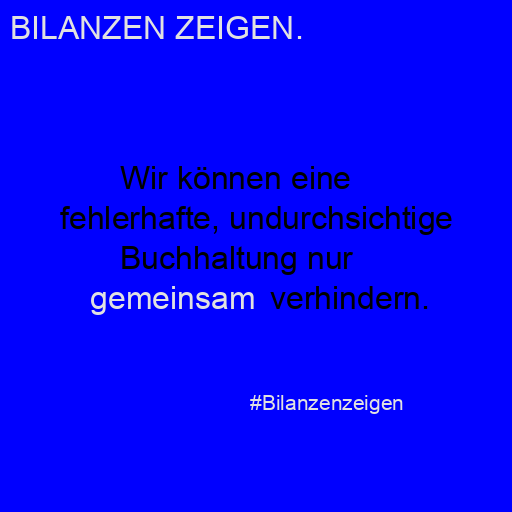

In [ ]:
width = 512
height = 512


message_0 = "BILANZEN ZEIGEN."
message_1 = "Wir können eine"
message_2 = "fehlerhafte, undurchsichtige"
message_3 = "Buchhaltung nur"
message_4 = "gemeinsam"
message_4_2 = "verhindern."

message_5 = "#Bilanzenzeigen"


img_text = Image.new('RGB', (width, height), color='blue')

imgDraw = ImageDraw.Draw(img_text)

imgDraw.text((10, 10), message_0, fill=(225, 225, 225),  font=font_type_1)
imgDraw.text((120, 160), message_1, fill=(0, 0, 0),  font=font_type_1)
imgDraw.text((60, 200), message_2, fill=(0, 0, 0),  font=font_type_1)
imgDraw.text((120, 240), message_3, fill=(0, 0, 0),  font=font_type_1)
imgDraw.text((90, 280), message_4, fill=(225, 225, 225),  font=font_type_1)
imgDraw.text((270, 280), message_4_2, fill=(0, 0, 0),  font=font_type_1)
imgDraw.text((250, 390), message_5, fill=(225, 225, 225),  font=font_type_2)



img_text

In [ ]:
img_text.save("image_funny.png")

In [ ]:
###################



width = 512
height = 512

message_1 = "Wir können eine"
message_2 = "fehlerhafe, undurchsichtige"
message_3 = "Buchhaltung nur"
message_4 = "gemeinsam verhidern"

message_5 = "#Bilanzenzeigen"


img_text = Image.new('RGB', (width, height), color='blue')

imgDraw = ImageDraw.Draw(img_text)


## drwagin titles

imgDraw.text((50, 100), message_1, fill=(0255, 0, 0),  font=font_type_1)
imgDraw.text((30, 40), message_text_name_2, fill=(0, 0, 0),  font=font_type_1)

imgDraw.text((30, 90), message_another_text_name, fill=(0, 0, 0),  font=font_type_1)
imgDraw.text((30, 115), message_another_text_name_2, fill=(0, 0, 0),  font=font_type_1)


### drwaing descriptions

imgDraw.text((30, 190), message_1, fill=(0, 0, 0),  font=font_type_1)

position = 200

for i in range(len(list_message_2)):

  position = position + 20
  imgDraw.text((30, position), list_message_2[i], fill=(0, 0, 0),  font=font_type_2)

